In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from nltk.util import ngrams

# Importation des données

In [2]:
df2 = pd.read_csv("C:/Users/Audrey/Desktop/Cours/Master/M2/Analyse_donnees_textuelles/Projet/Questionnaires.csv",sep=";")

In [3]:
df2.head()

,AGE,ID_NUM_TEL,SEXE,NIVEAU_SUPERIEUR_CHOIX,TYPE_TELEPHONE,ABONNEMENT_ILLIMITE,TEMPS_UTILISATION_SMS,ENVOI_SMS_SEMAINE,UTILISATION_T9,DESTINATAIRE_AMIS,DESTINATAIRE_COLLEGUES,DESTINATAIRE_FAMILLE,DESTINATAIRE_COMPAGNON,DUREE_LECTURE
0,16,202,Femme,lycee,classique,non,1 a 3,moins de 5,non,5,3,4,0,"4,19"
1,11,401,Homme,college,autre,oui,moins de 1,20 a 50,non,6,0,1,0,"5,24"
2,15,290,Homme,college,blackberry,non,1 a 3,plus de 100,oui,6,0,6,6,"3,14"
3,12,271,Homme,college,blackberry,oui,1 a 3,plus de 100,non,5,0,2,6,"1,05"
4,14,75,Femme,college,blackberry,oui,plus de 5,plus de 100,non,6,0,2,0,"6,29"


In [4]:
df = pd.read_csv("C:/Users/Audrey/Desktop/Cours/Master/M2/Analyse_donnees_textuelles/Projet/BDD_sms.csv",sep=";") # on a un pb d'encodage pour certaines lettres --'
df = df[df["SMS_ANON"].notna()]

In [5]:
df.head()

,NUM_SMS,ID_NUM_TEL,SMS_ANON
0,1,477,Hey ca va?\r\nAlors cette rentree?\r\nVa fallo...
1,2,477,Ok super merci! Oui j'y comprends rien du tout...
2,3,477,Coucou !\r\nC'est quand la feria de Nimes?\r\n...
3,4,477,Coucou :)\r\nOui ca c'est bien passe!\r\nAlors...
4,5,477,On peut se rejoindre quelque part? Tu as cours...


In [6]:
df = df.merge(df2, how='left', on='ID_NUM_TEL') # On fusion les deux dataframes par rapport à leur colonnes ID_NUM_TEL

In [7]:
corpus_sexe = df[["SMS_ANON","SEXE"]] # Selection des bonnes colonnes 
corpus_Femme=corpus_sexe.query("SEXE=='Femme'")
corpus_Homme=corpus_sexe.query("SEXE=='Homme'")

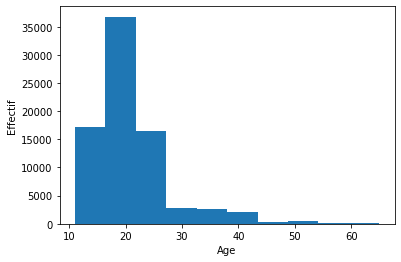

In [9]:
from matplotlib import pyplot as plt
age = df["AGE"]
plt.hist(age)
plt.xlabel("Age")
plt.ylabel("Effectif")
plt.show()

In [10]:
bins= [0,16.5,18.5,20.5,22.5,24.5,100] # Interval d'ages 
labels = [1,2,3,4,5,6] # Catégorie 
df["Agegroup"]=pd.cut(df['AGE'], bins=bins, labels=labels, right=False) # On crée une nouvelle colonnes avec les catégories

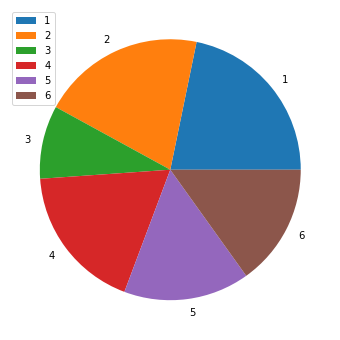

In [11]:
compte = df.groupby(["Agegroup"]).count() 
compte.plot.pie(y='ID_NUM_TEL', figsize=(6, 6)) 
plt.ylabel("")
plt.show()

In [40]:
corpus_age = df[["SMS_ANON","AGE","Agegroup"]] # Selection des bonnes colonnes 
corpus_age1=corpus_age.query('Agegroup==1')
corpus_age2=corpus_age.query('Agegroup==2')
corpus_age3=corpus_age.query('Agegroup==3')
corpus_age4=corpus_age.query('Agegroup==4')
corpus_age5=corpus_age.query('Agegroup==5')
corpus_age6=corpus_age.query('Agegroup==6')

In [31]:
print(corpus_age4["SMS_ANON"])

40       Coucou mon coeur je vais appeler le banquier. ...
43       Hello ! La rentrée est bien passée j'ai que 3 ...
44       Tu m'appelles pas? T'as eu mon texto? Tu finis...
45       C'est pas grave pour les schoumi-Gateau une au...
46       Ok keep cool pr l'entreprise et tiens moi au j...
47                           Punaise. Me souviens plus :-(
48       De rien ^^ c'est vrai que c'était tard hier je...
49       Pour les inscriptions on passe au Secretariat ...
51       <PRE_4> est pas la ! <PRE_3> non plus ! Tanpis...
56       Non je viens de voir l'heure qu'il etait et j'...
68       Par hasard la grande carte monoprix serait pas...
70       Moi aussi ! Roo c'est chiant lol Tanpis merci ...
72       J'ai rien dit car j'ai cru qu'elle était là vu...
74       Hey ça va ? L'allemand c'est en G001 ! À 9h15 ...
78               Fais moi signe quand tu es debout stp bsx
83       Pas de pb ! On arrivera à se voir un jour ! ;)...
97       Gut danke! Aber ich bin ein bischen műde, weil.

Liste des différents corpus

In [45]:
#Corpus entier
corpus_complet = df["SMS_ANON"]

#Corpus des sexes
corpus_femme = corpus_Femme["SMS_ANON"]
corpus_homme = corpus_Homme["SMS_ANON"]

#Corpus des ages
corpus_age_inf17 = corpus_age1["SMS_ANON"]
corpus_age_18 = corpus_age2["SMS_ANON"]
corpus_age_20 = corpus_age3["SMS_ANON"]
corpus_age_22 = corpus_age4["SMS_ANON"]
corpus_age_24 = corpus_age5["SMS_ANON"]
corpus_age_vieux = corpus_age6["SMS_ANON"]

# N-grammes 2 mots

In [47]:
dictionnaire = dict()
for ligne in corpus_complet:
        twograms = ngrams(ligne.split(), 2)
        for grams in twograms:
            valeur = " ".join(grams)
            if valeur in dictionnaire :
                dictionnaire[valeur] += 1
            else :
                dictionnaire[valeur] = 1

In [48]:
dictionnaire

{'Hey ca': 2,
 'ca va?': 80,
 'va? Alors': 26,
 'Alors cette': 37,
 'cette rentree?': 1,
 'rentree? Va': 1,
 'Va falloir': 22,
 'falloir se': 2,
 'se trouver': 8,
 'trouver un': 57,
 "un p'tit": 7,
 "p'tit creneau": 1,
 'creneau pour': 1,
 'pour se': 44,
 'se voir!': 5,
 'voir! Dis': 1,
 'Dis moi,': 20,
 'moi, est-ce': 1,
 'est-ce que': 46,
 'que tu': 2641,
 'tu sais': 349,
 'sais quand': 13,
 'quand commence': 1,
 'commence les': 6,
 'les cours': 188,
 'cours de': 128,
 'de langue': 6,
 'langue non': 1,
 'non specialiste?': 1,
 'specialiste? Bisoux': 1,
 'Ok super': 8,
 'super merci!': 2,
 'merci! Oui': 2,
 "Oui j'y": 11,
 "j'y comprends": 2,
 'comprends rien': 4,
 'rien du': 37,
 'du tout': 243,
 'tout moi': 1,
 'moi a': 26,
 'a cette': 10,
 'cette fac': 1,
 'fac :p': 1,
 ":p J'irai": 1,
 "J'irai me": 2,
 'me renseigner': 6,
 'renseigner aussi': 1,
 'aussi (': 1,
 '( si': 1,
 "si j'trouve": 2,
 "j'trouve le": 1,
 'le batiment': 14,
 'batiment :)': 1,
 ':) )': 5,
 ') Merci': 1,
 'Merc

# N-grammes 3 mots

In [49]:
dictionnaire2 = dict()
for ligne in corpus_complet:
        threegrams = ngrams(ligne.split(), 3)
        for grams in threegrams:
            valeur = " ".join(grams)
            if valeur in dictionnaire :
                dictionnaire2[valeur] += 1
            else :
                dictionnaire2[valeur] = 1

In [50]:
dictionnaire2

{'Hey ca va?': 1,
 'ca va? Alors': 1,
 'va? Alors cette': 1,
 'Alors cette rentree?': 1,
 'cette rentree? Va': 1,
 'rentree? Va falloir': 1,
 'Va falloir se': 1,
 'falloir se trouver': 1,
 'se trouver un': 1,
 "trouver un p'tit": 1,
 "un p'tit creneau": 1,
 "p'tit creneau pour": 1,
 'creneau pour se': 1,
 'pour se voir!': 1,
 'se voir! Dis': 1,
 'voir! Dis moi,': 1,
 'Dis moi, est-ce': 1,
 'moi, est-ce que': 1,
 'est-ce que tu': 1,
 'que tu sais': 1,
 'tu sais quand': 1,
 'sais quand commence': 1,
 'quand commence les': 1,
 'commence les cours': 1,
 'les cours de': 1,
 'cours de langue': 1,
 'de langue non': 1,
 'langue non specialiste?': 1,
 'non specialiste? Bisoux': 1,
 'Ok super merci!': 1,
 'super merci! Oui': 1,
 "merci! Oui j'y": 1,
 "Oui j'y comprends": 1,
 "j'y comprends rien": 1,
 'comprends rien du': 1,
 'rien du tout': 1,
 'du tout moi': 1,
 'tout moi a': 1,
 'moi a cette': 1,
 'a cette fac': 1,
 'cette fac :p': 1,
 "fac :p J'irai": 1,
 ":p J'irai me": 1,
 "J'irai me rensei